In this exercise, you are requested to implement a Neural Network with backpropogation using only *numpy*.

Notice:
- All activation functions in this network are Sigmoid
- The output of the network is one single value

### Created by Omer Keren & Alon Albahari

In [97]:
import numpy as np

In [98]:
class MyNN:
    def __init__(self, learning_rate, layer_sizes):
        '''
        learning_rate - remember etta from class? this is it!
        layer_sizes - a simple list of numbers - where each number is the size of each layer - i.e. the
                        number of neurons in the layer. So the length of this list is the number of layers
                        in our neural network
        model_param - a dictionary that will store the parameters/variables - such as weights and biases
        '''
        self.learning_rate = learning_rate
        self.layer_sizes = layer_sizes
        self.model_params = {}
        self.memory = {}
        self.grads = {}

        # Initializing weights with random values
        for layer_index in range(len(layer_sizes) - 1):
            W_input = layer_sizes[layer_index + 1]
            W_output = layer_sizes[layer_index]
            self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
            self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1

    # this function performs forward step (over all network elements) for a single data item/instance 
    def forward_single_instance(self, x):    
        a_i_1 = x
        self.memory['a_0'] = x
        for layer_index in range(len(self.layer_sizes) - 1):
            W_i = self.model_params['W_' + str(layer_index + 1)]
            b_i = self.model_params['b_' + str(layer_index + 1)]
            z_i = np.dot(W_i, a_i_1) + b_i
            a_i = 1/(1+np.exp(-z_i))
            self.memory['a_' + str(layer_index + 1)] = a_i
            a_i_1 = a_i
        return a_i_1
  
    # a sample loss function
    def log_loss(y_hat, y):
        '''
        Logistic loss, assuming a single value in y_hat and y.
        '''
        m = y_hat[0]
        cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
        return cost
  
  
  #this function performs a backpropogation for a single data item/instance
    def backward_single_instance(self, y):
        a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
        dz = a_output - y

        for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
            print(layer_index)
            # means activations functions for each position in the network
            a_l_1 = self.memory['a_' + str(layer_index - 1)]
            # error of prediction * res
            dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
            self.grads['dW_' + str(layer_index)] = dW
            # current wieght
            W_l = self.model_params['W_' + str(layer_index)]
            # current bias
            db = dz
            self.grads['db_' + str(layer_index)] = db
            dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))

    def update(self):
        for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
            # names of key objects
            Wi = 'W_' + str(layer_index)
            bi = 'b_' + str(layer_index)
            dWi = 'dW_' + str(layer_index)
            dbi = 'db_' + str(layer_index)
            
            W_i = self.model_params[Wi]
            b_i = self.model_params[bi]
            dW_i = self.grads[dWi]
            db_i = self.grads[dbi]
            
            self.model_params[Wi] = W_i - self.learning_rate * dW_i
            self.model_params[bi] = b_i - self.learning_rate * db_i

 
      #def forward_batch(self, X)
    def forward_batch(self, x):    
        a_i_1 = x
        self.memory['a_0'] = x
        for layer_index in range(len(self.layer_sizes) - 1):
            W_i = self.model_params['W_' + str(layer_index + 1)]
            b_i = self.model_params['b_' + str(layer_index + 1)]
            z_i = np.dot(W_i, a_i_1) + b_i.reshape(-1,1)
            a_i = 1/(1+np.exp(-z_i))
            self.memory['a_' + str(layer_index + 1)] = a_i
            a_i_1 = a_i
        return a_i_1
            

      # TODO: implement backward for a batch y.shape = (1, number_of_instance)
      #def backward_batch(self, y)
    def backward_batch(self, y):
        m = y.shape[1]
        a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
        dz = a_output - y
        
        for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
            # means activations functions for each position in the network
            a_l_1 = self.memory['a_' + str(layer_index - 1)]

            # error of prediction * res
            dW = (np.dot(dz, a_l_1.T)) / m
            self.grads['dW_' + str(layer_index)] = dW

            # current wieght
            W_l = self.model_params['W_' + str(layer_index)]

            # (activations vector devrsion) * (current wieght)
            tmp = dz
            self.memory['dz_' + str(layer_index)] = dz

            # current bias
            b_l = self.model_params['b_' + str(layer_index)]

            # (activations vector devrsion) * (current bias)
            db = np.sum(dz) / m
            self.grads['db_' + str(layer_index)] = db
            dz = (a_l_1 * (1 - a_l_1)) * np.dot(W_l.T, tmp)

            

      # TODO: implement log_loss_batch, for a batch of instances
      # def log_loss(self, y_hat, y)
    def log_loss_batch(self, y_hat, y):
        m = y_hat.shape[1]
        cost = 1/m * (-np.dot(y,np.log(y_hat).T) - np.dot(1-y,np.log(1-y_hat).T))
        return cost
        
        

The next class will cover the neural network. We will focus on what we learned in class - A feed forward network having multiple layers.
The class already has methods for forward and backward runs of a single instance of data (single row in a dataset). You have to implement each code that has "TODO" in it.

In [99]:
nn = MyNN(0.01, [3, 2, 1])

In [100]:
nn.model_params

{'W_1': array([[-0.00183457, -0.00417865, -0.04180828],
        [ 0.08847231,  0.07212246,  0.11498373]]),
 'b_1': array([ 0.13839357, -0.00715556]),
 'W_2': array([[-0.10545561, -0.00624427]]),
 'b_2': array([-0.11271583])}

In [101]:
x = np.random.randn(3)
y = np.random.randn(1)

y_hat = nn.forward_single_instance(x)
print(y_hat)

[0.45695926]


In [102]:
nn.backward_single_instance(y)

2
1


In [103]:
# A train function for training the neural network
def train(X, y, epochs, batch_size):
    lossHistory = np.zeros((epochs,1))
    for e in range(1, epochs + 1):
        epoch_loss = 0
        # shuffle
        shuffler = np.random.permutation(X.shape[1])
        X = X[:,shuffler]
        y = y[:,shuffler]
        # divide to batches
        X = X[:,0:(X.shape[1]//batch_size)*batch_size]
        y = y[:,0:(y.shape[1]//batch_size)*batch_size]
        batches = np.array(list(zip(np.split(X,X.shape[1]//batch_size,axis=1),np.split(y,y.shape[1]//batch_size,axis=1)))) 

        for X_b, y_b in batches:
            #print(X_b)
            #print(y_b)
            y_hat = nn.forward_batch(X_b)
            epoch_loss += nn.log_loss_batch(y_hat, y_b)
            nn.backward_batch(y_b)
            nn.update()
            lossHistory[e-1] = epoch_loss/len(batches)

        print(f'Epoch {e}, loss={epoch_loss/len(batches)}')
    return lossHistory



In [104]:
# TODO: Make sure the following network trains properly

nn = MyNN(0.001, [6, 4, 3, 1])

X = np.random.randn(6, 100)
y = np.random.randn(1, 100)
batch_size = 8
epochs = 2

train(X, y, epochs, batch_size)

Epoch 1, loss=[[0.73440766]]
Epoch 2, loss=[[0.73090487]]


<ipython-input-103-3e21d7ec8c41>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batches = np.array(list(zip(np.split(X,X.shape[1]//batch_size,axis=1),np.split(y,y.shape[1]//batch_size,axis=1))))


array([[0.73440766],
       [0.73090487]])

#TODO: train on an external dataset

Train on the Bike Sharing dataset, using day.csv file from https://archive.ics.uci.edu/ml/machine-learning-databases/00275/.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is as the following:
    raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


raw = pd.read_csv('day.csv')
raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"])

X = raw[['temp', 'atemp', 'hum', 'windspeed', 'weekday']].values
y = raw["success"].values

nn = MyNN(0.001, [5, 40, 30, 10, 7, 5, 3, 1])
batch_size = 8
epochs = 100

loss = train(X.T, y.reshape(1,-1), epochs, batch_size)


<ipython-input-103-3e21d7ec8c41>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batches = np.array(list(zip(np.split(X,X.shape[1]//batch_size,axis=1),np.split(y,y.shape[1]//batch_size,axis=1))))


Epoch 1, loss=[[0.6958921]]
Epoch 2, loss=[[0.69567163]]
Epoch 3, loss=[[0.69546472]]
Epoch 4, loss=[[0.69529203]]
Epoch 5, loss=[[0.69510478]]
Epoch 6, loss=[[0.69494988]]
Epoch 7, loss=[[0.69480605]]
Epoch 8, loss=[[0.69467503]]
Epoch 9, loss=[[0.69453867]]
Epoch 10, loss=[[0.69443459]]
Epoch 11, loss=[[0.69432395]]
Epoch 12, loss=[[0.69421709]]
Epoch 13, loss=[[0.69413803]]
Epoch 14, loss=[[0.69405071]]
Epoch 15, loss=[[0.69397814]]
Epoch 16, loss=[[0.69390298]]
Epoch 17, loss=[[0.69383327]]
Epoch 18, loss=[[0.69377672]]
Epoch 19, loss=[[0.69371711]]
Epoch 20, loss=[[0.69366466]]
Epoch 21, loss=[[0.69361533]]
Epoch 22, loss=[[0.69356821]]
Epoch 23, loss=[[0.69353557]]
Epoch 24, loss=[[0.69349081]]
Epoch 25, loss=[[0.69345619]]
Epoch 26, loss=[[0.69342644]]
Epoch 27, loss=[[0.69340263]]
Epoch 28, loss=[[0.69336849]]
Epoch 29, loss=[[0.69334329]]
Epoch 30, loss=[[0.69331705]]
Epoch 31, loss=[[0.69329908]]
Epoch 32, loss=[[0.69328235]]
Epoch 33, loss=[[0.69325619]]
Epoch 34, loss=[[0.6

Text(0, 0.5, 'Loss')

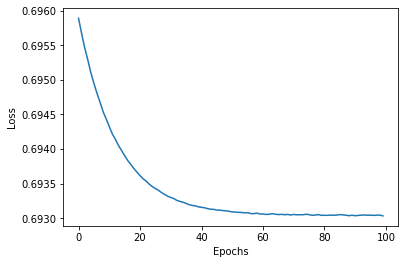

In [119]:
plt.plot(range(epochs),loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")